# Part 1 
# Lateral aircraft state space model `
###Lateral stability - stability along longitudinal axis. So no pitch(q). Only consideration roll(p) and yaw(r)

State vector x = [v, p, phi, r]^T is a column vector
  
> v : velocity (ft/s)
p : Roll rate (rad/s)
phi : Roll angle (rad)
r : Yaw rate (rad/s) 

Control vector eta = [del_r, del_a]^T is a column vector
  where 

> del_r : Rudder deflection angle (rad), 
  del_a : Aileron deflection angle (rad)

To create A matrix, derivatives of state variabkes were evaluated wrt time. 

v_dot = X_u*u + X_beta*beta + X_p*p + X_r*r
p_dot = L_u*u + L_beta*beta + L_p*p + L_r*r
where phi_dot = p
r_dot = N_u*u + N_beta*beta + N_p*p + N_r*r

  u - del_r (rudder deflection angle)
  beta = del_a (aileron deflection angle)

To create B matrix, how the control inputs affect the state variables.
The control derivative equations can be expressed as:
v_dot = X_del_r*delt_r + X_del_a*del_a
p_dot = L_del_r*del_r + L_del_a*del_a
φ_dot = 0
r_dot = N_delta_r*del_r + N_del_a*del_a

In [5]:
!pip install numpy
!pip install control
!pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
import control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 kB 12.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Given values
V= 279.1    # Velocity ft/sec
rho = 0.002377  # Density slug/ft^3
S = 5500    # Wing area ft^2
c_bar = 27.3    # Mean chord length in ft
W = 564032     # Weight in lb
b = 195.7   # Wing span in ft
Ix = 14.3e6  # MOI about x axis in slug ft^2
Iy = 32.3e6  # MOI about y axis in slug ft^2
Iz = 45.3e6  # MOI about z axis in slug ft^2
Ixz = -2.23e6  # MOI about xz axis in slug ft^2

# Aerodynamic Derivatives
Cy_beta = -0.96
Cyp = 0.0
Cyr = 0.0
Cl_beta = -0.221
Clp = -0.45
Clr = 0.101
Cn_beta = 0.15
Cnp = -0.121
Cnr = -0.30

# Other aerodynamic derivatives
Cl_del_a = 0.0461
Cn_del_a = 0.0064
Cy_del_r = 0.175
Cl_del_r = 0.007
Cn_del_r = -0.109

In [7]:
#Conversion Factors
ft_to_m = 0.3048    # Conversion from ft to meters

#Calculate some important parameters
g = 32.174  # Accelration due to gravity in ft/sec^2
Q = 0.5 * rho * V**2    # Dynamic Pressure (lb/ft^2)
m = W / 32.174 #Mass (lb to slug)

# Lateral A/C state space model

Using the state vector and control vector and all aerodynamic derivatives, lateral aircraft state-space model (A, B, C, D) matrices can be obtained. 

In [8]:
# State vector x = [v  p  phi r]^T --> Column vector
# Control vector --> eta = [del_r    del_a]^T --> Column vector
# Sideslip angle is beta

# State space model matrices
A = np.array([[-Cy_beta*Q*S/(m*V), 0, 0, -m*g/(m*V)],
              [0, 0, 1, 0],
              [0, 0, 0, 1],
              [0, (b * (Clp*Q*S*b + Cnp*Q*S*c_bar)) / (Iy*V), 0, (Clr*Q*S*b + Cnr*Q*S*c_bar) / (Iy*V)]])

B = np.array([[Cy_del_r*Q*S/m, Cl_del_a*Q*S / (Iy*V)],
              [0, 0],
              [0, 0],
              [Cn_del_r*Q*S*b / (Iy*V), Cn_del_a*Q*S*c_bar / (Iy*V)]])

C = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])

D = np.zeros((2, 2))

# Printing the state space model matrices
print("A matrix (System dynamics) :")
print(A)
print("\n")

print("B matrix (Influence of control vars on state vars:")
print(B)
print("\n")

print("C matrix: ")
print(C)
print("\n")

print("D matrix:")
print(D)

A matrix (System dynamics) :
[[ 9.99066182e-02  0.00000000e+00  0.00000000e+00 -1.15277678e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00 -1.00996322e+00  0.00000000e+00  6.53832422e-04]]


B matrix (Influence of control vars on state vars:
[[ 5.08300937e+00  2.60387490e-06]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-1.20485980e-03  9.86874235e-06]]


C matrix: 
[[1 0 0 0]
 [0 1 0 0]]


D matrix:
[[0. 0.]
 [0. 0.]]


# POLE - ZERO MAP
A pole zero map of the state-space plant can be generated. The poles give a better idea about the stability of the system. 

In [9]:
### Pole-zero map of the state-space plant

sys = control.StateSpace(A, B, C, D)
Poles = sys.pole()
Zeroes = sys.zero()

## Printing poles and zeroes of system
print("Poles:")
for pole in Poles:
    print(pole)

print("\nZeroes:")
for zero in Zeroes:
    print(zero)

# No zeroes in the system

Poles:
(0.09990661818611711+0j)
(-1.0030922088609868+0j)
(0.5018730206416656+0.8688919983740085j)
(0.5018730206416656-0.8688919983740085j)

Zeroes:


The poles generated are complex numbers and there are no zeroes present in the system. In this case, the system has 4 poles and their values indicate the stability modes of the lateral dynamics of the system. 

### Analysis of Poles
1. *Pole 1 - Real part = 0.0999, Imaginary part = 0.*
This pole has a small positive real part and no imaginary part. This shows a slightly stable mode of lateral dynamics 

2. *Pole 2 - Real term = -1.003, Imaginary term = 0* 
This pole has a negative real part, which shows a stable mode of lateral dynamics. In fact it is a showcase of a dominant stability mode. 

3. *Pole 3 - Real term = 0.5019, Imaginary term = 0.8688*
This pole again has a positive real part and a non-zero imaginary term. This shows an oscillator mode with damping ratio less than 1. This pole shows a slightly unstable mode. 

4. *Pole 4 - Real term = 0.5019, Imaginary term = -0.8689*
This pole contains a positive real part and non-zero, but negative imaginary term. It represents the conjugate of pole 3 above. Due to this, the pole 4 shows the presence of a same oscillatory mode with a damping ratio less than 1. Also indicates a slightly unstable mode. 


## Any Concerns associated with poles or instability
The ooutput generated does not show the presence of amy poles with significant positive real parts which would have indicated instability. But the presence of poles with small positive real parts and non-zero imaginary parts, i.e poles 3 and 4 indicate the presence of a potental oscillatory behavior with a lightly damped mode. This may not be very concerning regarding a huge instability, but demonstrates that the lateral dynamics may exhibit some oscillations that may have to be controlled. 

Overall the system showcases a stable and slightly stable lateral dynamics. 

# Background Theory for analysis of poles & zeroes 
To analyze the stability properties of the lateral aircraft state space model, the poles of the system need to be examined. In this case the poles are the eigenvalues of the system matrix A and give an idea about the tabilty and dynamic behavior of the system. The pole-zero map helped identify the locations of the poles and zeroes in the complex plane. If any pole has a positive real part or is close to the imaginary axis, it indicates potential system instability. On the other hand, if any pole has negative real parts and are farther from the imaginary axis on the left hand plane, it indicates potential system stability. 

Regarding zeroes in a system, presence of zeroes can affect the system's response and behavior. Zeroes indicate values that make the transfer function zero, which further gives an indea into input-output relationships. The presence and respective location of zeroes affects system's frequency response and transient behavior. 

# Effect of dihedral on spiral mode

The dihedral angle which was represented as beta and shows the upward angle between the wings of an aicraft, affects the lateral stability, which can further impact the spiral mode. The spiral mode fundamentally means the oscillatory motion, where the aircraft rolls and yaws simultaneously. 

On increasing the dihedral angle, the spiral  mode will be affected by poles 3 and 4. These 2 poles are complex conjugate pairs with same real and imagianry terms. 

When dihedral is increased, the lateral aircraft stability is also improved. This would mean the real parts of the poles in the spiral modes would move more towards the negative plane, which would mean a more stable spiral mode.

*   Pole 3 - Real term = 0.5019, Imaginary term = 0.8688
*  Pole 4 - Real term = 0.5019, Imaginary term = -0.8689*

For both poles 3 and 4, we would expect the real parts to move closer to the negative axis, increasing the stability in the roll-yaw oscillation of the spiral mode. 

This increase in lateral stability, also helps prevent chances of divergence in the spiral mode. 

# STEP RESPONSE OF ROLL RATE

In [ ]:
# To show a step response of roll rate given an input

# Define the time vector for simulation
t = np.linspace (0,10,1000)
# Define the input step function
u = np.ones_like(t)

# Simulate the system step response
t, y = control.step_response(sys, T=t, input=u)

# Reshape the y array to have a 1D shape
y = np.squeeze(y)
y = y[0]

#Plotting the step response

plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Roll Rate')
plt.title('Step Response of Roll Rate')
plt.grid(True)
plt.show()


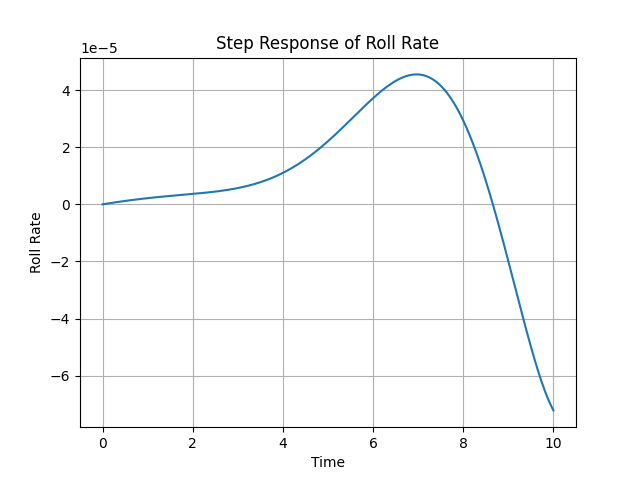

The roll rate starts from 0 and increases steadily in the first 7 seconds. This tells that the system initially responds positively to the step input. 
After reaching a peak value of roll rate in 7 seconds, there is a sharp drop and reaches negative values. This behavior shows that the system has a high overshoot and some oscillations. 
The sharp drop in the plot is indicative of some damping. Damoing refers to the system's ability to resist oscillations and intuitively retun to a stable state. 